* Nathanial Hernandez
* Nicholas Malott
* Sam Oakes
* Iker Santos Perez
* Joshua Shell




In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd 
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# dataset = pd.read_csv('/content/drive/MyDrive/2021FS Machine Learning/HW1/insurance.csv')
dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
dataset = dataset.drop(['sex','smoker','region'], axis=1)
dataset.head(5)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


Implement linear regression using the **Normal Equation**.

Divide the data into (1) a training set, and (2) a test set.  
Choose the training set randomly and let the remaining data form the test set.  Use the data matrix obtained from the training set to estimate the parameter θ.  

Then for each data point use θ  to obtain the model output for that data point.


For each choice of the training and test data points, compute two errors using the MSE: 
1.   **The error on the training set.**  This gives us an idea of how well the model captures the training data.  We call this the modeling power of the model.
2.   **The error on the test set.**  This gives us an idea how good is the model on the test data.  We call this the generalization power of the model. 

Repeat the above procedure on training sets of increasing size from 20% to 80% of the whole data, in increments of 10%, that is


[[0.2, 135330944.4159501, 127680934.57382897, 135330944.4159501, 127680934.57382898, array([[-9425.67273735],
       [  252.73068455],
       [  395.28633952],
       [  723.65524963]]), array([-9425.67273735,   252.73068455,   395.28633952,   723.65524963])], [0.3, 122847527.25018907, 131977266.03740643, 122847527.25018907, 131977266.03740636, array([[-8121.45354288],
       [  223.01472794],
       [  376.18587187],
       [  881.16618701]]), array([-8121.45354288,   223.01472794,   376.18587187,   881.16618701])], [0.4, 121318445.04718068, 134919233.92871782, 121318445.04718068, 134919233.92871788, array([[-3554.46718655],
       [  212.80862509],
       [  245.53356651],
       [  646.94325707]]), array([-3554.46718655,   212.80862509,   245.53356651,   646.94325707])], [0.5, 121937144.50732301, 136443065.88819245, 121937144.50732297, 136443065.8881926, array([[-5039.82405805],
       [  219.0225326 ],
       [  287.57086204],
       [  589.03989385]]), array([-5039.82405805,   219

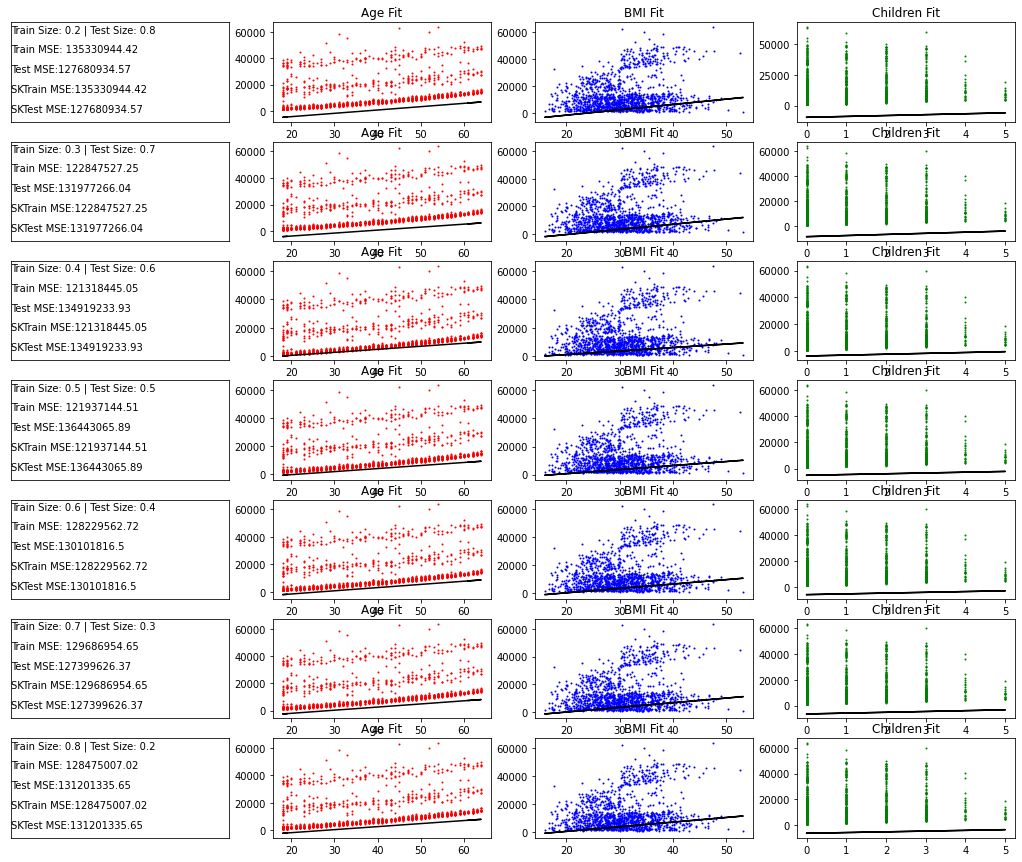

In [ ]:
#Store [pct, trainMSE, testMSE, theta]
results = []
for pct in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
  #Store into local variables for processing
  x = dataset[['age','bmi','children']]
  y = dataset[['charges']]

  #Split into (1) a training set and (2) a test set; Randomize before selection
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=pct, random_state=42)

  #Convert to numpy arrays
  x = np.array(x_train)
  y = np.array(y_train)

  #Append a bias column to x_train
  x = np.append(np.ones((len(x),1)), x, axis=1)

  ## Computing Theta (w0 through w3 of form (w0 + w1x1 + w2x2 + w3x3))

  #Compute xTx
  xTx = np.transpose(x).dot(x)

  #Invert xTx, dot with xT and y
  xTx = np.linalg.inv(xTx)
  theta = xTx.dot(np.transpose(x)).dot(y)

  #Train Hypothesis
  h = x @ theta

  #Calculate training MSE
  #(MSE(o) = MSE(X, o) = 1/m SUM(m, i = 1, (oT . x(i) - y(i))^2 =
  cost = np.transpose((h - y)) @ (h - y)
  trainMSE = cost / len(y)

  #Update for test data
  x = np.array(x_test)
  y = np.array(y_test)

  #Append a bias column to x_train
  x = np.append(np.ones((len(x),1)), x, axis=1)

  #Test Hypothesis
  h = x @ theta

  #Calculate test MSE
  cost = np.transpose((h - y)) @ (h - y)
  testMSE = cost / len(y)




  #Use SKLearn's LinearRegression to compare our results
  #Only for comparisons sake
  x = np.array(x_train)
  y = np.array(y_train)

  reg = LinearRegression().fit(x,y)

  intercept = np.array(reg.intercept_)
  coef = np.array(reg.coef_)[0]

  skTheta = np.append(intercept,coef, axis=0)

  h = reg.predict(x)
  cost = np.transpose((h-y)) @ (h - y)
  skTrainMSE = cost/len(y)

  x = np.array(x_test)
  y = np.array(y_test)

  h = reg.predict(x)
  cost = np.transpose((h-y)) @ (h - y)
  skTestMSE = cost/len(y)

  
  
  
  #Append results to res table
  results.append([pct, trainMSE[0,0], testMSE[0,0], skTrainMSE[0,0], skTestMSE[0,0], theta, skTheta])




print(results)

#Plot our results
#Store into local variables for processing
x = dataset[['age','bmi','children']]
y = dataset[['charges']]
x = np.array(x)
y = np.array(y)

print(x.size,y.size)

#Create a figure and a grid for plots
fig = plt.figure(figsize=(18,15))
gs = gridspec.GridSpec(len(results),4)

#Track which result set
i = 0

for res in results:
  ax = fig.add_subplot(gs[i,0])
  ax.text(0.0, 0.9, 'Train Size: ' + str(res[0]) + ' | Test Size: ' + str(round(1.0-res[0],1)))
  ax.text(0.0, 0.7, 'Train MSE: ' + str(round(res[1],2)))
  ax.text(0.0, 0.5, 'Test MSE:' + str(round(res[2],2)))
  ax.text(0.0, 0.3, 'SKTrain MSE:' + str(round(res[3],2)))
  ax.text(0.0, 0.1, 'SKTest MSE:' + str(round(res[4],2)))
  ax.set_xticks([])
  ax.set_yticks([])

  #Grab line slope, intercept
  theta = res[5]
  intercept = theta[0]

  ax = fig.add_subplot(gs[i,1])
  ax.set_title('Age Fit')
  #Perform y=mx+b with slope, intercept
  y_pred = theta[1]*x[:,0] + intercept 

  ax.scatter(x[:,0], y, color='red', s=1)
  ax.plot(x[:,0], y_pred, color='black')
  

  ax = fig.add_subplot(gs[i,2])
  ax.set_title('BMI Fit')
  #Perform y=mx+b with slope, intercept
  y_pred = theta[2]*x[:,1] + intercept 
  ax.scatter(x[:,1], y, color='blue', s=1)
  ax.plot(x[:,1], y_pred, color='black')
  

  ax = fig.add_subplot(gs[i,3])
  ax.set_title('Children Fit')
  #Perform y=mx+b with slope, intercept
  y_pred = theta[3]*x[:,2] + intercept 
  ax.scatter(x[:,2], y, color='green', s=1)
  ax.plot(x[:,2], y_pred, color='black')
  i+=1

plt.show()

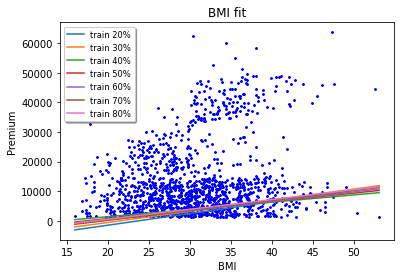

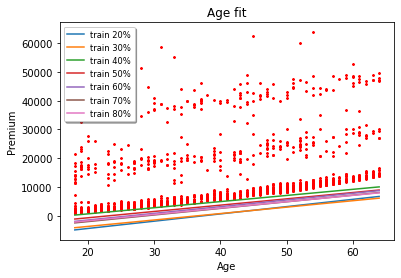

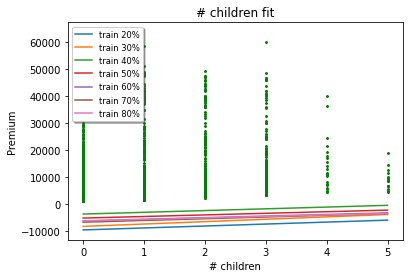

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


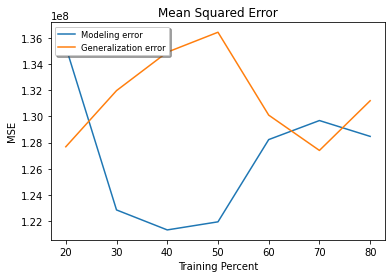

In [ ]:
# Plot BMI
BMI = 1;
AGE = 0;
CHD = 2;
for i in range(0, 7):
  res = results[i]
  theta = res[5]
  intercept = theta[0]
  xs = np.array([min(x[:,BMI]), max(x[:,BMI])])
  y_pred = theta[BMI+1]*xs + intercept

  plt.title("BMI fit"), plt.xlabel("BMI"), plt.ylabel("Premium")
  plt.scatter(x[:,BMI], y, color='blue', s=1)
  trainsz = 'train ' + str((i+2)*10) + '%'
  plt.plot([min(x[:,BMI]), max(x[:,BMI])], y_pred, label=trainsz)
  plt.legend(loc='upper left', shadow=True, fontsize='small', numpoints=1)

plt.show()

# Plot Age
for i in range(0, 7):
  res = results[i]
  theta = res[5]
  intercept = theta[0]
  xs = np.array([min(x[:,AGE]), max(x[:,AGE])])
  y_pred = theta[AGE+1]*xs + intercept

  plt.title("Age fit"), plt.xlabel("Age"), plt.ylabel("Premium")
  plt.scatter(x[:,AGE], y, color='red', s=1)
  trainsz = 'train ' + str((i+2)*10) + '%'
  plt.plot([min(x[:,AGE]), max(x[:,AGE])], y_pred, label=trainsz)
  plt.legend(loc='upper left', shadow=True, fontsize='small', numpoints=1)

plt.show()

# Plot # of children
for i in range(0, 7):
  res = results[i]
  theta = res[5]
  intercept = theta[0]
  xs = np.array([min(x[:,CHD]), max(x[:,CHD])])
  y_pred = theta[CHD+1]*xs + intercept

  plt.title("# children fit"), plt.xlabel("# children"), plt.ylabel("Premium")
  plt.scatter(x[:,CHD], y, color='green', s=1)
  trainsz = 'train ' + str((i+2)*10) + '%'
  plt.plot([min(x[:,CHD]), max(x[:,CHD])], y_pred, label=trainsz)
  plt.legend(loc='upper left', shadow=True, fontsize='small', numpoints=1)

plt.show()

test = np.array(results)
ModErrs = test[:,1]
GenErrs = test[:,2]

# Plot modeling and errors
xs = range(20, 90, 10)
plt.title("Mean Squared Error"), plt.xlabel("Training Percent"), plt.ylabel("MSE")
plt.plot(xs, ModErrs, label='Modeling error')
plt.legend(loc='upper left', shadow=True, fontsize='small', numpoints=1)
plt.plot(xs, GenErrs, label='Generalization error')
plt.legend(loc='upper left', shadow=True, fontsize='small', numpoints=1)

plt.show()